<a href="https://colab.research.google.com/github/myduyen2000204/Data_LDA/blob/main/TOPICMODELING_OFFICIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/myduyen2000204/Data_LDA/main/Data_AI.json')
print(df.target_names.unique())
df.head()

['Development Studies; Economics; Social Sciences, Interdisciplinary'
 'Computer Science, Information Systems; Information Science & Library Science; Management'
 'Business; Management' 'Management' 'Business'
 'Engineering, Multidisciplinary; Engineering, Manufacturing'
 'Computer Science, Artificial Intelligence' 'Business; Ethics'
 'Computer Science, Artificial Intelligence; Engineering, Industrial'
 'Business; Communication'
 'Computer Science, Interdisciplinary Applications; Engineering, Electrical & Electronic'
 'Computer Science, Artificial Intelligence; Computer Science, Theory & Methods'
 'Chemistry, Multidisciplinary; Engineering, Multidisciplinary; Materials Science, Multidisciplinary; Physics, Applied'
 'Computer Science, Information Systems; Computer Science, Interdisciplinary Applications'
 'Computer Science, Artificial Intelligence; Computer Science, Interdisciplinary Applications'
 'Information Science & Library Science' 'Pediatrics'
 'Computer Science, Information Syst

,Publication Type,Authors,Article Title,Source Title,Language,Document Type,Conference Title,Author Keywords,content,DOI,target_names
0,C,"Chang, Q; Fang, G; Chen, XJ",Analysis on The Development of Al Clothing Mar...,PROCEEDINGS OF THE 2019 4TH INTERNATIONAL CONF...,English,Proceedings Paper,4th International Conference on Social Science...,Clothing Brand; Artificial Intelligence; Marke...,"With the emergence of Alpha Go, artificial int...",,Development Studies; Economics; Social Science...
1,J,"Yang, X; Li, HW; Ni, LK; Li, T",Application of Artificial Intelligence in Prec...,JOURNAL OF ORGANIZATIONAL AND END USER COMPUTING,English,Article,,Artificial Intelligence-Technology; Market Rec...,The development of artificial intelligence tec...,10.4018/JOEUC.20210701.oa10,"Computer Science, Information Systems; Informa..."
2,C,"Iaia, L; Christofi, M; Vrontis, D",TECHNOLOGICAL INNOVATIONS AND ARTIFICIAL INTEL...,13TH ANNUAL CONFERENCE OF THE EUROMED ACADEMY ...,English,Proceedings Paper,13th Annual Conference of the EuroMed-Academy-...,Technological innovations; artificial intellig...,,,Business; Management
3,J,"Bag, S; Gupta, S; Kumar, A; Sivarajah, U",An integrated artificial intelligence framewor...,INDUSTRIAL MARKETING MANAGEMENT,English,Article,,Artificial intelligence; Big data; Knowledge m...,This study examines the effect of big data pow...,10.1016/j.indmarman.2020.12.001,Business; Management
4,J,"Tchelidze, CL",POTENTIAL AND SKILL REQUIREMENTS OF ARTIFICIAL...,QUALITY-ACCESS TO SUCCESS,English,Article,,Artificial intelligence; Digitalization; Requi...,Technological development has contributed to d...,,Management


In [5]:
import nltk
nltk.download('stopwords')

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
import gensim
data = list(df['content'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['with', 'the', 'emergence', 'of', 'alpha', 'go', 'artificial', 'intelligence', 'has', 'become', 'hot', 'topic', 'and', 'marketing', 'has', 'ushered', 'in', 'the', 'era', 'of', 'intelligence', 'through', 'the', 'combination', 'of', 'artificial', 'intelligence', 'technology', 'including', 'virtual', 'reality', 'data', 'insight', 'etc', 'marketing', 'can', 'bring', 'better', 'consumption', 'experience', 'to', 'consumers', 'based', 'on', 'the', 'analysis', 'of', 'the', 'advanced', 'technology', 'of', 'artificial', 'intelligence', 'and', 'the', 'characteristics', 'of', 'clothing', 'marketing', 'this', 'paper', 'concludes', 'that', 'clothing', 'marketing', 'in', 'the', 'era', 'of', 'artificial', 'intelligence', 'shows', 'the', 'characteristics', 'of', 'precision', 'marketing', 'new', 'experiential', 'marketing', 'and', 'human', 'computer', 'interaction', 'marketing', 'and', 'promotes', 'the', 'development', 'of', 'clothing', 'marketing', 'however', 'it', 'is', 'concluded', 'that', 'artific

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['with', 'the', 'emergence', 'of', 'alpha', 'go', 'artificial', 'intelligence', 'has', 'become', 'hot', 'topic', 'and', 'marketing', 'has', 'ushered', 'in', 'the', 'era', 'of', 'intelligence', 'through', 'the', 'combination', 'of', 'artificial', 'intelligence', 'technology', 'including', 'virtual_reality', 'data', 'insight', 'etc', 'marketing', 'can', 'bring', 'better', 'consumption', 'experience', 'to', 'consumers', 'based', 'on', 'the', 'analysis', 'of', 'the', 'advanced', 'technology', 'of', 'artificial', 'intelligence', 'and', 'the', 'characteristics', 'of', 'clothing', 'marketing', 'this', 'paper', 'concludes', 'that', 'clothing', 'marketing', 'in', 'the', 'era', 'of', 'artificial', 'intelligence', 'shows', 'the', 'characteristics', 'of', 'precision', 'marketing', 'new', 'experiential', 'marketing', 'and', 'human', 'computer', 'interaction', 'marketing', 'and', 'promotes', 'the', 'development', 'of', 'clothing', 'marketing', 'however', 'it', 'is', 'concluded', 'that', 'artificial'

In [8]:
import nltk
nltk.download('stopwords')

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from gensim.utils import simple_preprocess
import spacy

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['emergence', 'alpha', 'go', 'artificial', 'intelligence', 'become', 'hot', 'topic', 'marketing', 'usher', 'era', 'intelligence', 'combination', 'artificial', 'intelligence', 'technology', 'include', 'virtual_reality', 'datum', 'insight', 'marketing', 'bring', 'well', 'consumption', 'experience', 'consumer', 'base', 'analysis', 'technology', 'artificial', 'intelligence', 'characteristic', 'clothing', 'marketing', 'paper', 'conclude', 'clothing', 'marketing', 'era', 'artificial', 'intelligence', 'show', 'characteristic', 'precision', 'marketing', 'new', 'experiential', 'marketing', 'human', 'computer', 'interaction', 'marketing', 'promote', 'development', 'clothing', 'marketing', 'however', 'conclude', 'artificial', 'intelligence', 'can', 'completely', 'replace', 'role', 'human', 'being', 'marketing']]


In [10]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 5), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 3), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 6), (29, 1), (30, 9), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1)]]


In [11]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('alpha', 1),
  ('analysis', 1),
  ('artificial', 5),
  ('base', 1),
  ('become', 1),
  ('being', 1),
  ('bring', 1),
  ('can', 1),
  ('characteristic', 2),
  ('clothing', 3),
  ('combination', 1),
  ('completely', 1),
  ('computer', 1),
  ('conclude', 2),
  ('consumer', 1),
  ('consumption', 1),
  ('datum', 1),
  ('development', 1),
  ('emergence', 1),
  ('era', 2),
  ('experience', 1),
  ('experiential', 1),
  ('go', 1),
  ('hot', 1),
  ('however', 1),
  ('human', 2),
  ('include', 1),
  ('insight', 1),
  ('intelligence', 6),
  ('interaction', 1),
  ('marketing', 9),
  ('new', 1),
  ('paper', 1),
  ('precision', 1),
  ('promote', 1),
  ('replace', 1),
  ('role', 1),
  ('show', 1),
  ('technology', 2),
  ('topic', 1),
  ('usher', 1),
  ('virtual_reality', 1),
  ('well', 1)]]

In [12]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

In [13]:
lda_model.save("model_lda_10.model")

In [14]:
from gensim.models.ldamodel import LdaModel
lda = LdaModel.load("model_lda_10.model")

In [15]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.464733685746723

Coherence Score:  0.4137473633457602


In [16]:
pip install pyLDAvis==2.1.2

In [17]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.8090,"marketing, brand, customer, concept, technolog...","With the emergence of Alpha Go, artificial int..."
1,1,6.0,0.6094,"marketing, brand, customer, concept, technolog...",The development of artificial intelligence tec...
2,2,1.0,0.2992,"model, study, use, service, customer, base, re...",
3,3,3.0,0.6587,"mobile, consumer, user, video, social, creatio...",This study examines the effect of big data pow...
4,4,1.0,0.5019,"model, study, use, service, customer, base, re...",Technological development has contributed to d...
5,5,1.0,0.5268,"model, study, use, service, customer, base, re...",Artificial intelligence based applications are...
6,6,7.0,0.5265,"system, product, datum, information, base, des...",The technological evolution of recent years ha...
7,7,7.0,0.5576,"system, product, datum, information, base, des...",With the arrival of the era of artificial inte...
8,8,6.0,0.6388,"marketing, brand, customer, concept, technolog...",Purpose The purpose of this paper is to explai...
9,9,9.0,0.6032,"research, technology, marketing, business, ai,...",Artificial intelligence (AI) is (re)shaping st...


In [18]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.3295,"damage, failure, advertising, skill, sensory, healthy, self, subject, color, advanced","Over the past 10 years, traditional marketing methods have expanded beyond print, billboard, rad..."
1,1.0,0.9353,"model, study, use, service, customer, base, result, marketing, method, approach",Artificial Intelligence Marketingis a form of direct marketing which leverages the techniques of...
2,2.0,0.3688,"captcha, drug, city, asset, history, event, outperform, doctor, smartwatche, engine",Immunosuppressive treatment strategies for autoimmune diseases have changed drastically with the...
3,3.0,0.6587,"mobile, consumer, user, video, social, creation, object, retail, online, shopping",This study examines the effect of big data powered artificial intelligence on customer knowledge...
4,4.0,0.3466,"strategy, firm, purchase, self, open, fashion, tracking, optimize, study, practical_implication","Artificial intelligence (AI) can affect all of a company's functions, not least the purchasing d..."
5,5.0,0.4295,"web, sale, patient, art, agent, insurance, robotic, eye, pharmaceutical, startup",Artificial intelligence and machine learning are transforming the business nowadays as they have...
6,6.0,0.9379,"marketing, brand, customer, concept, technology, response, study, intelligence, user, content",Purpose This paper aims to explore how chief executive officers (CEOs) and C-suite marketing exe...
7,7.0,0.9124,"system, product, datum, information, base, design, problem, technique, intelligence, process","The information flow under the Internet involves all aspects of all walks of life, access to val..."
8,8.0,0.3972,"semantic, predictive, monitor, automatically, community, tokenization, blockchain, physical, rea...",Both researchers and practitioners are only in the early stages of examining and understanding t...
9,9.0,0.9073,"research, technology, marketing, business, ai, intelligence, paper, health, artificial, new",Purpose The purpose of this paper is to promote a broadened view of service research and to demo...


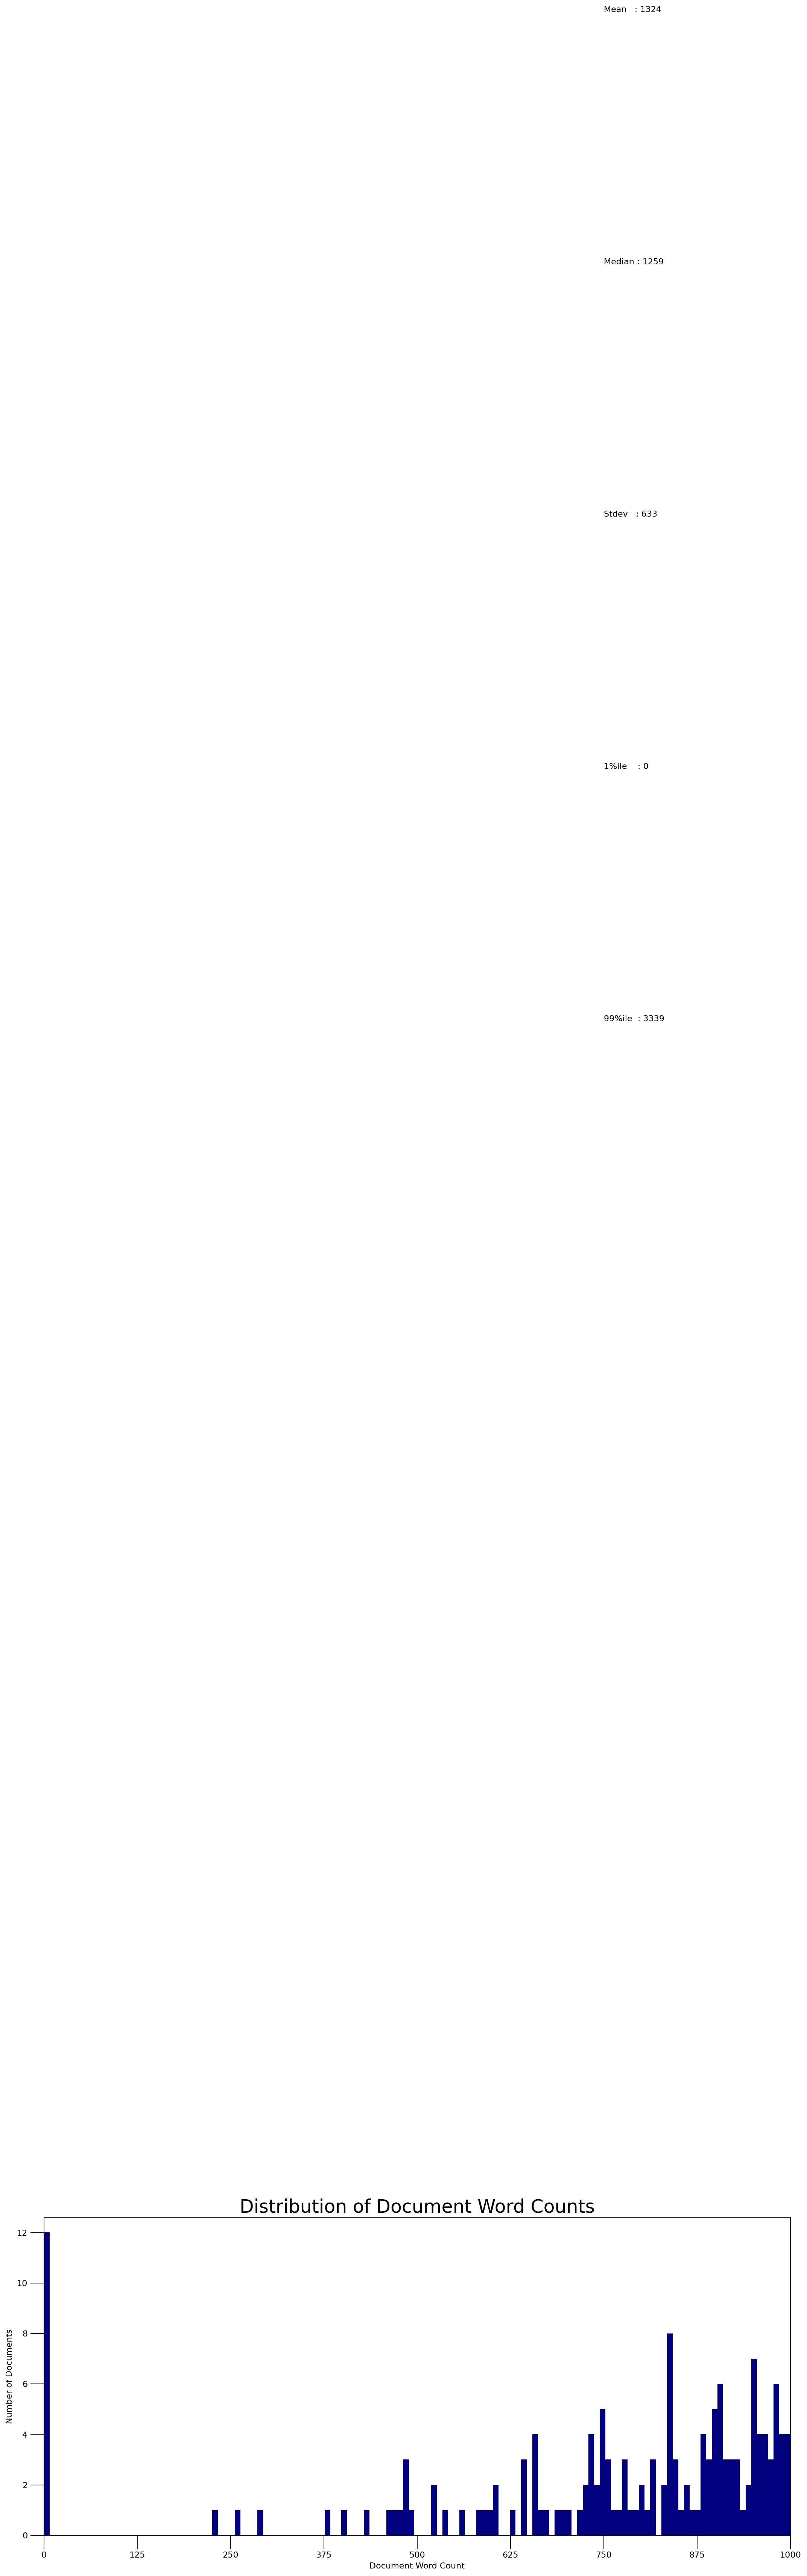

In [20]:
doc_lens = [len(d) for d in df_dominant_topic.Text]
import matplotlib.pyplot as plt
import numpy as np


# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

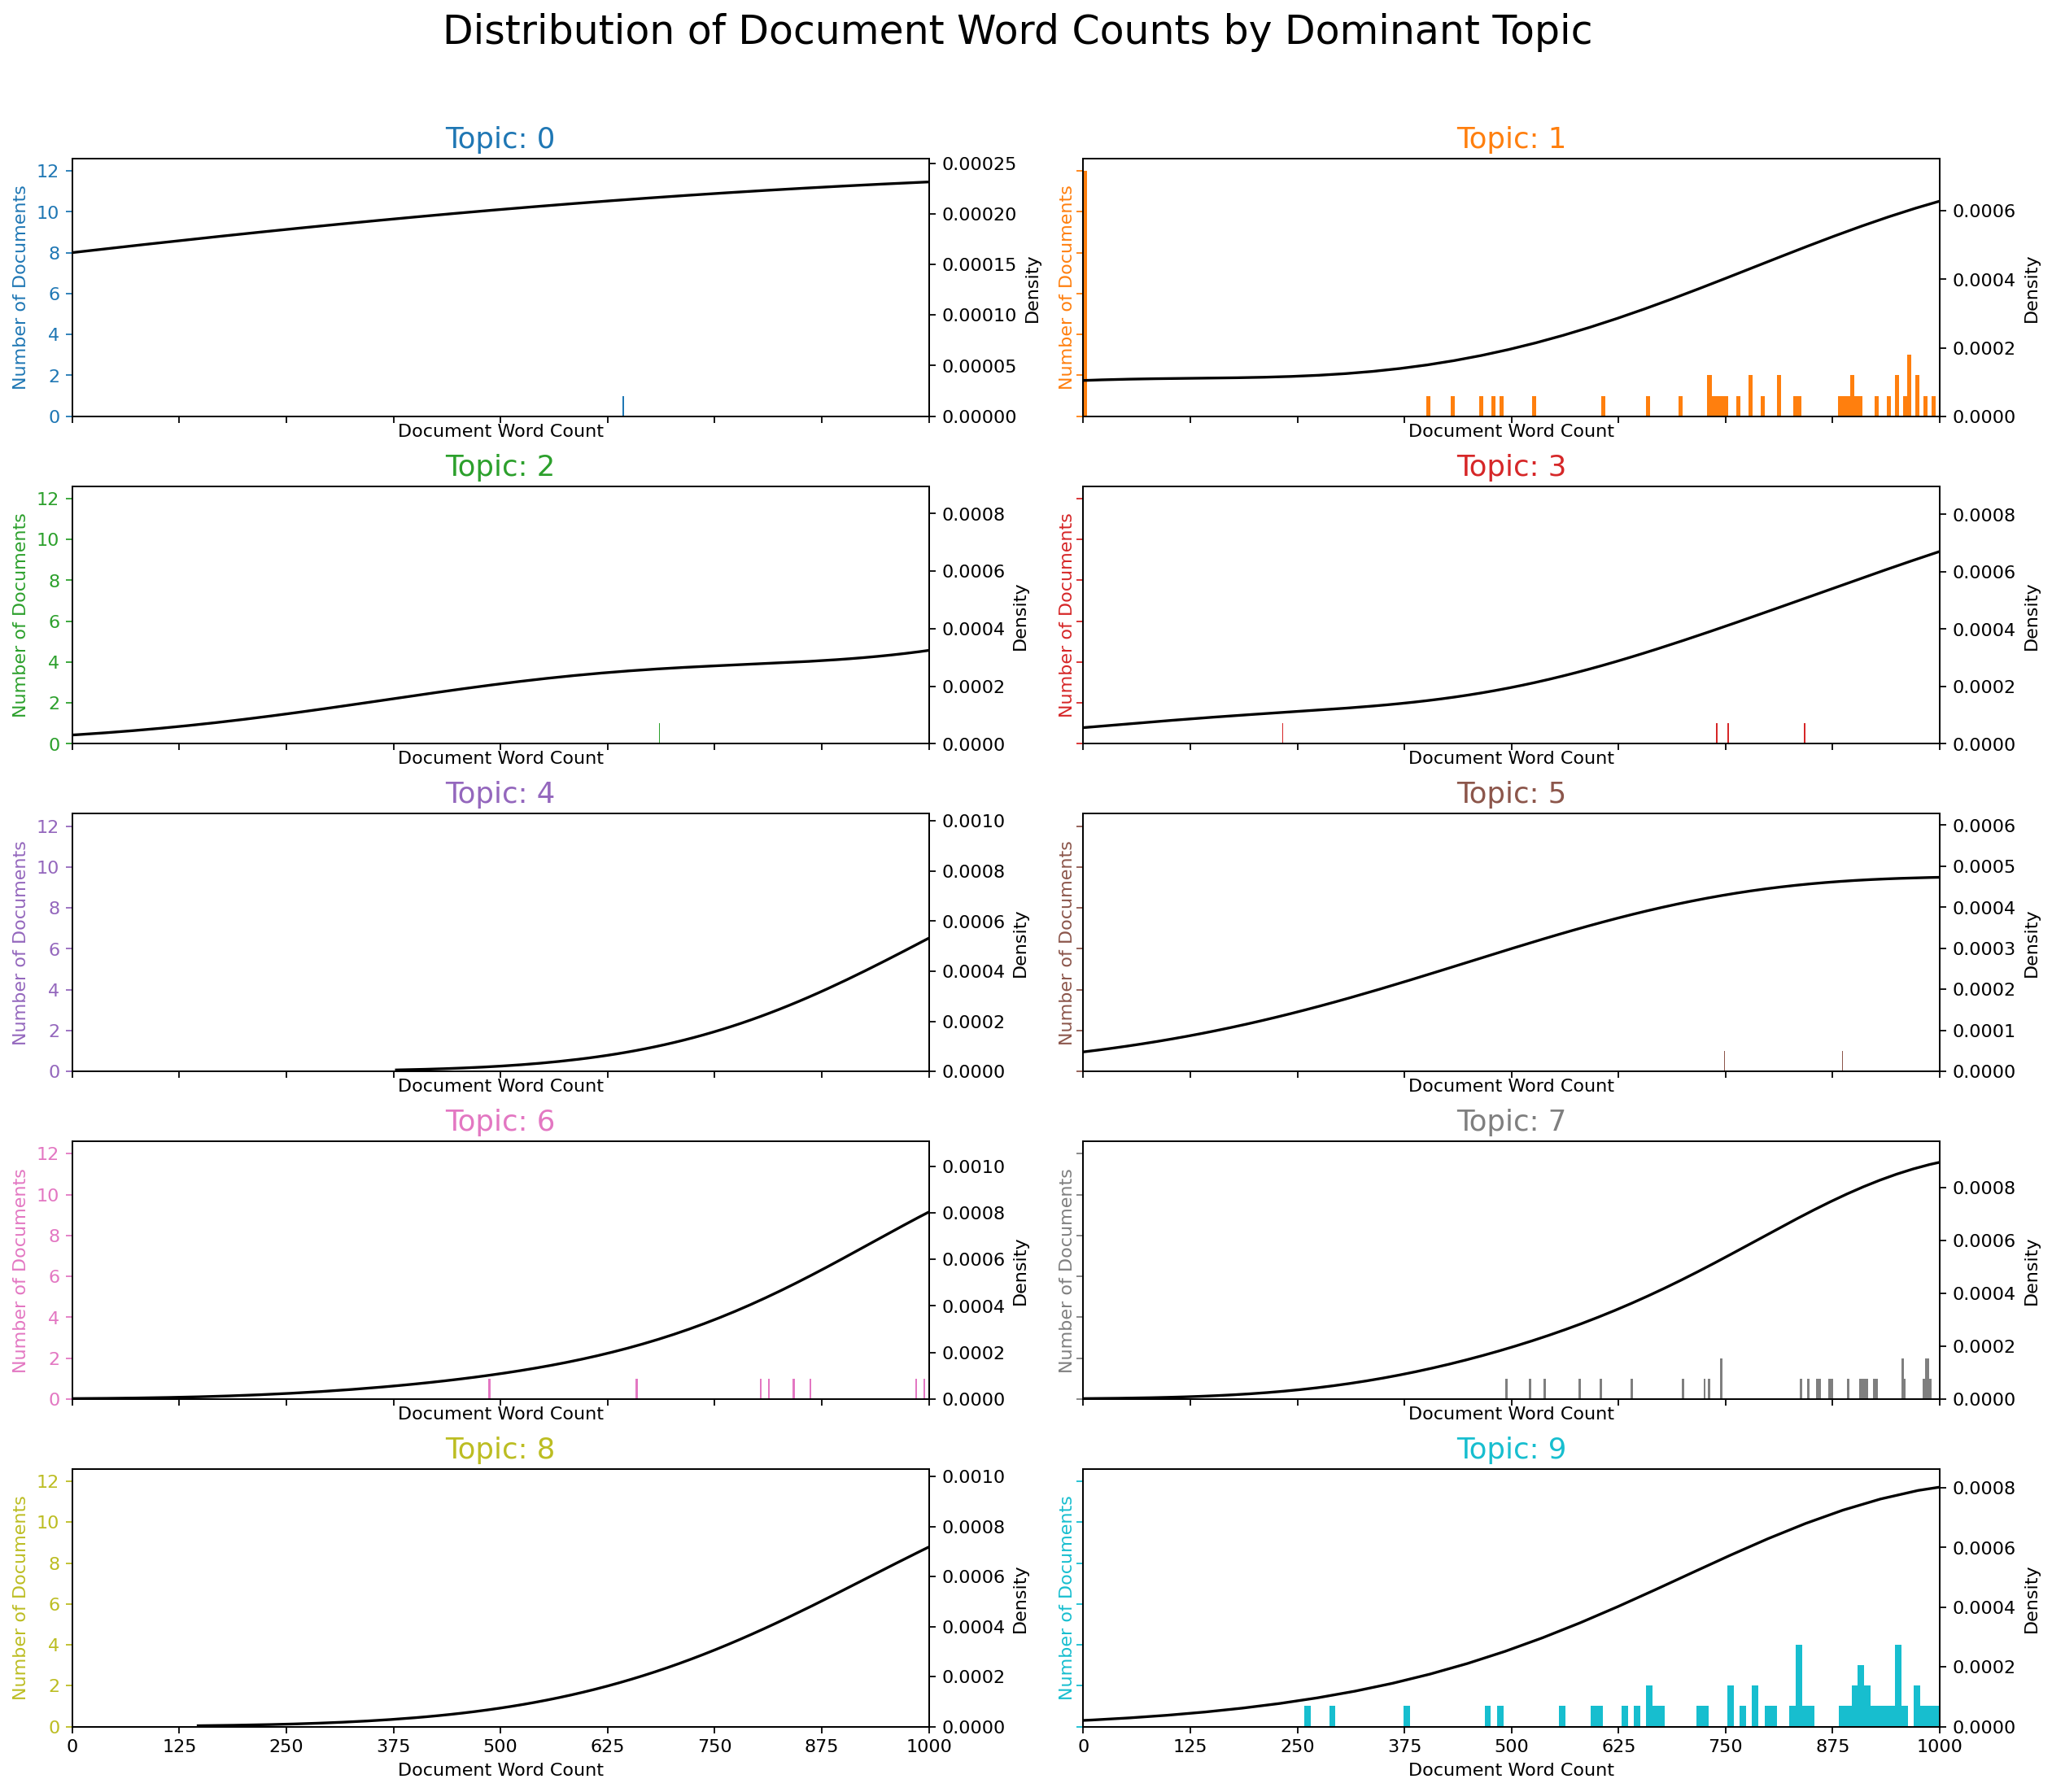

In [21]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))

fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

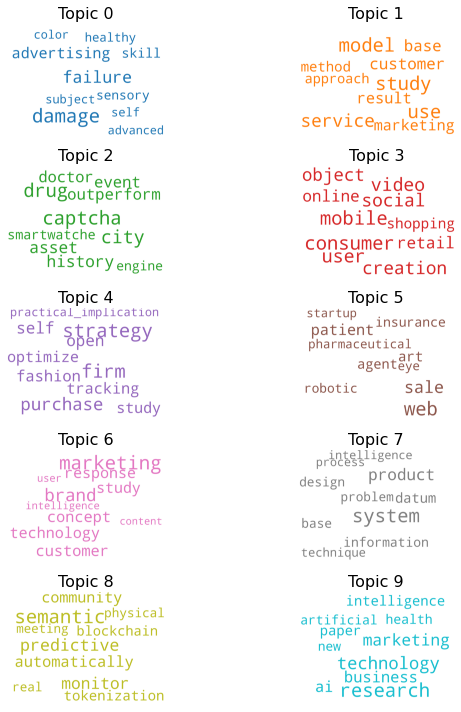

In [22]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

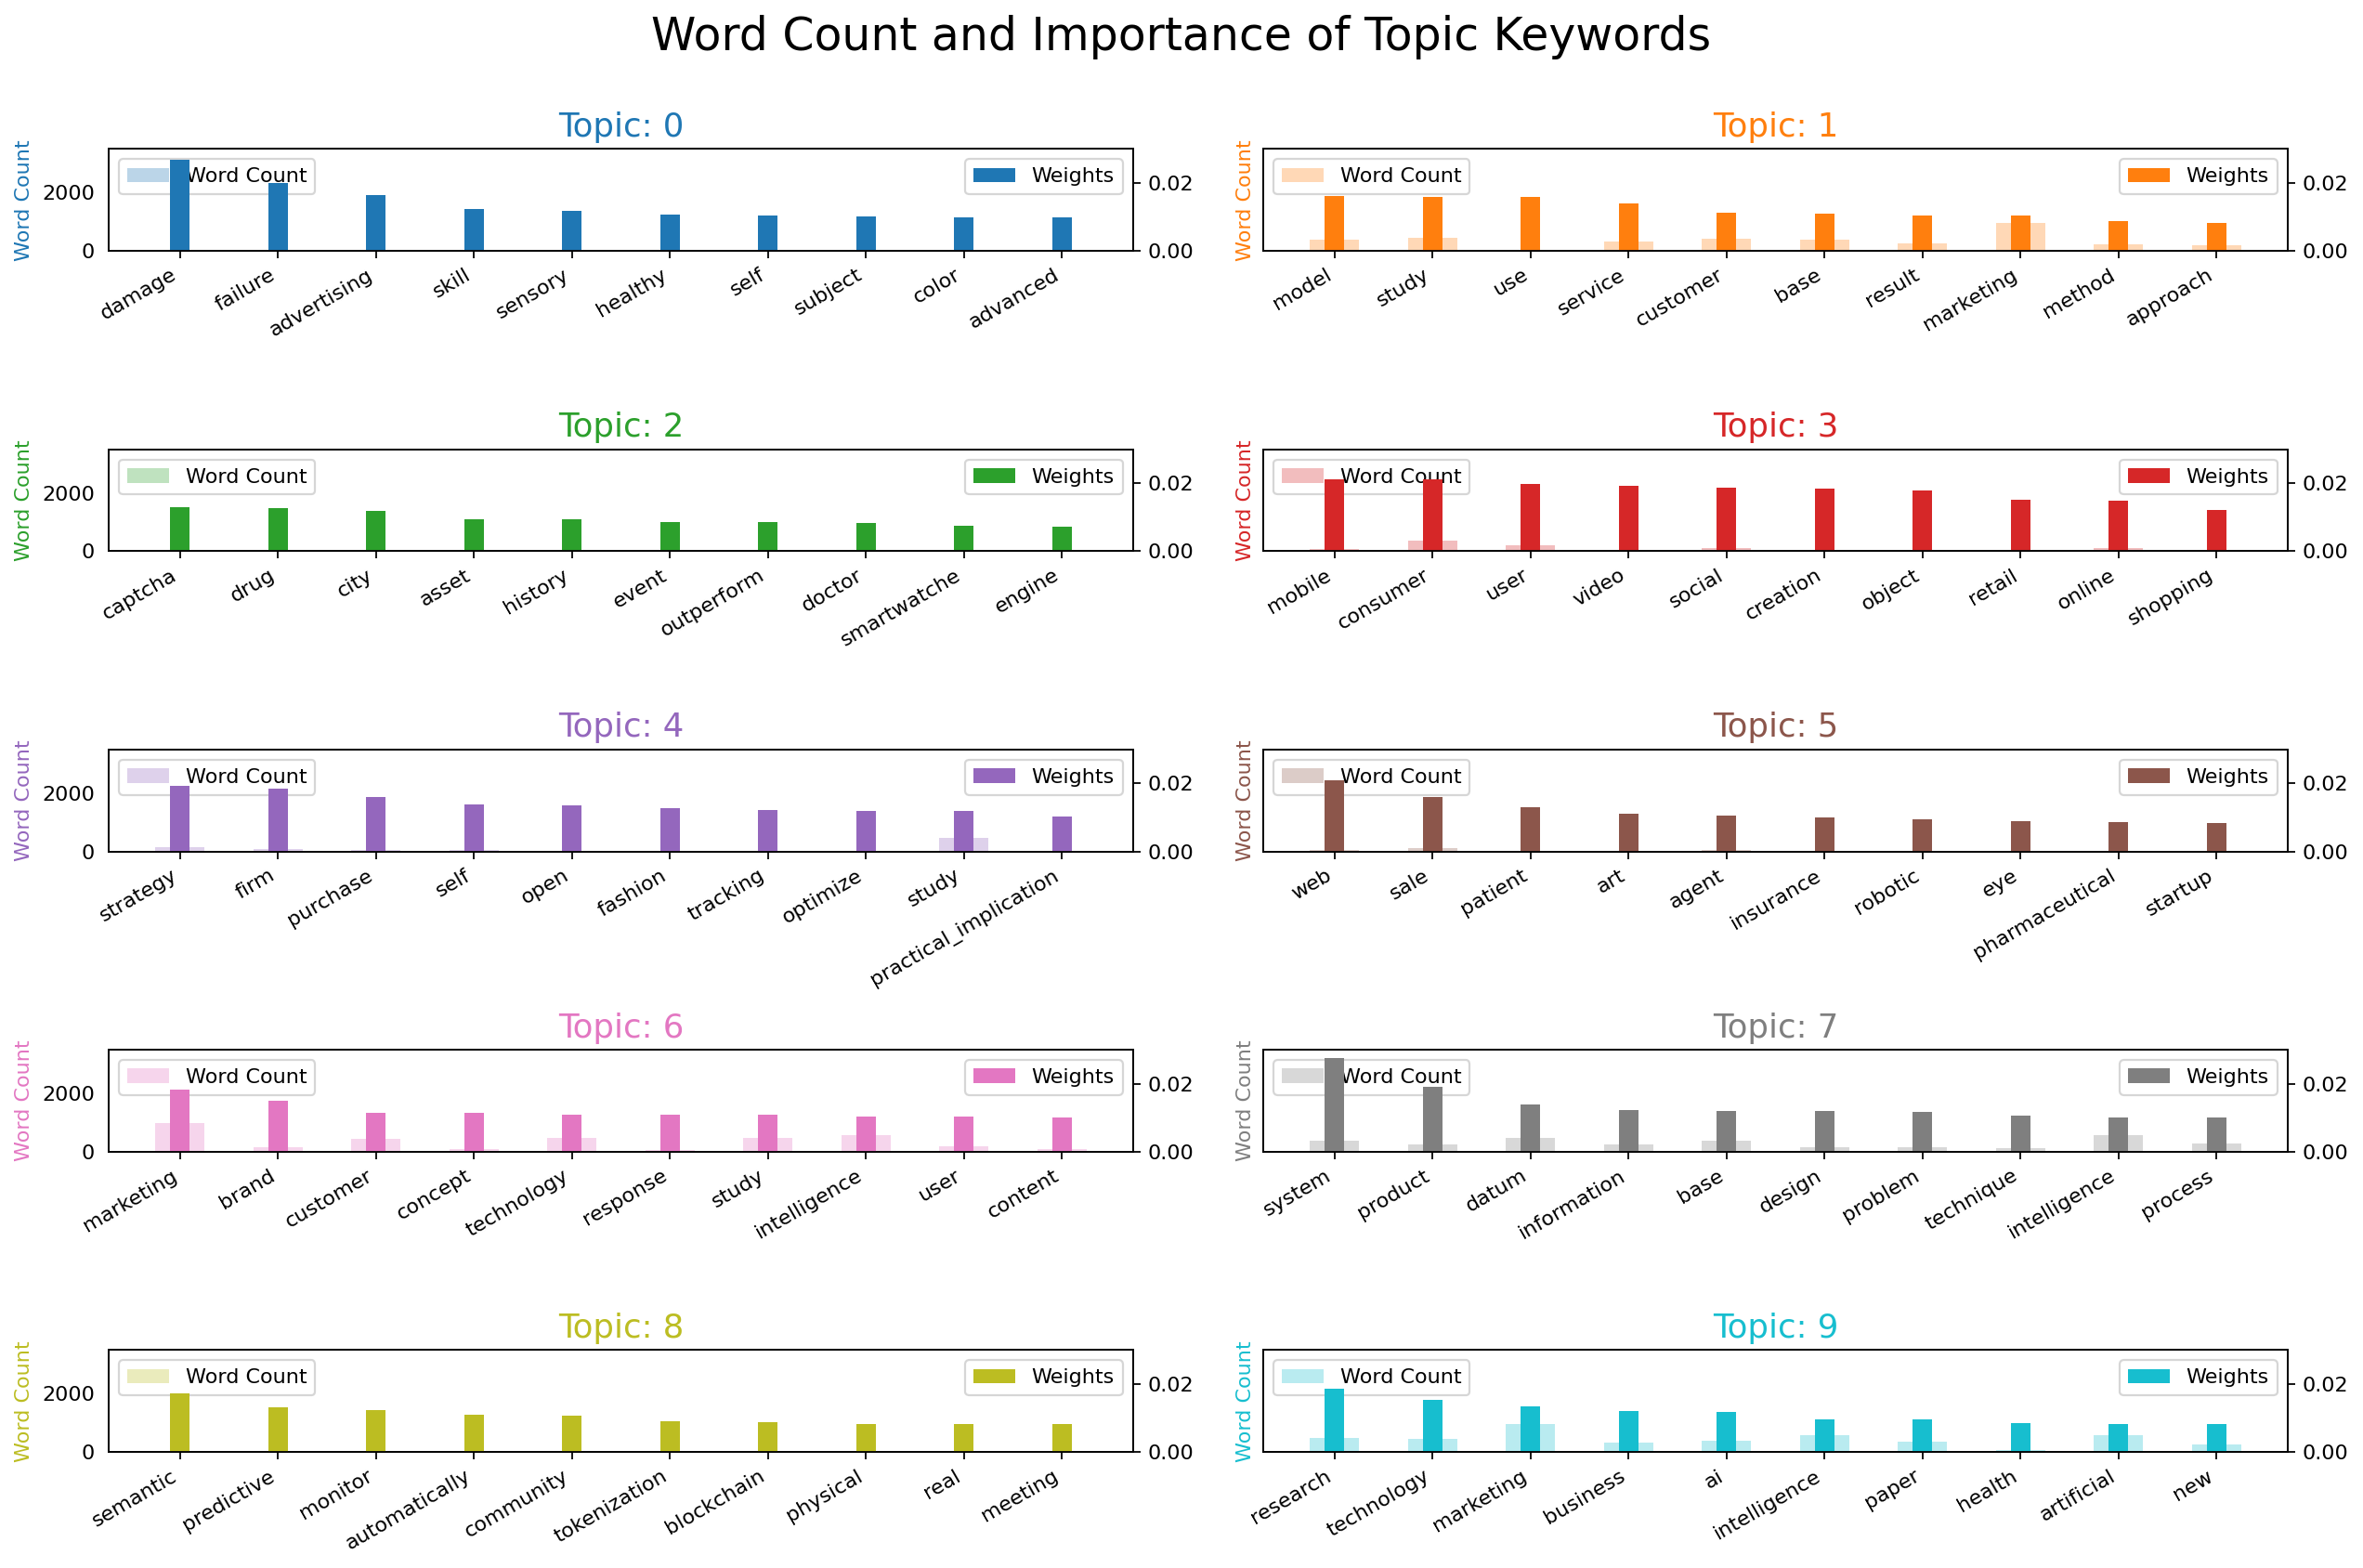

In [23]:
from collections import Counter
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

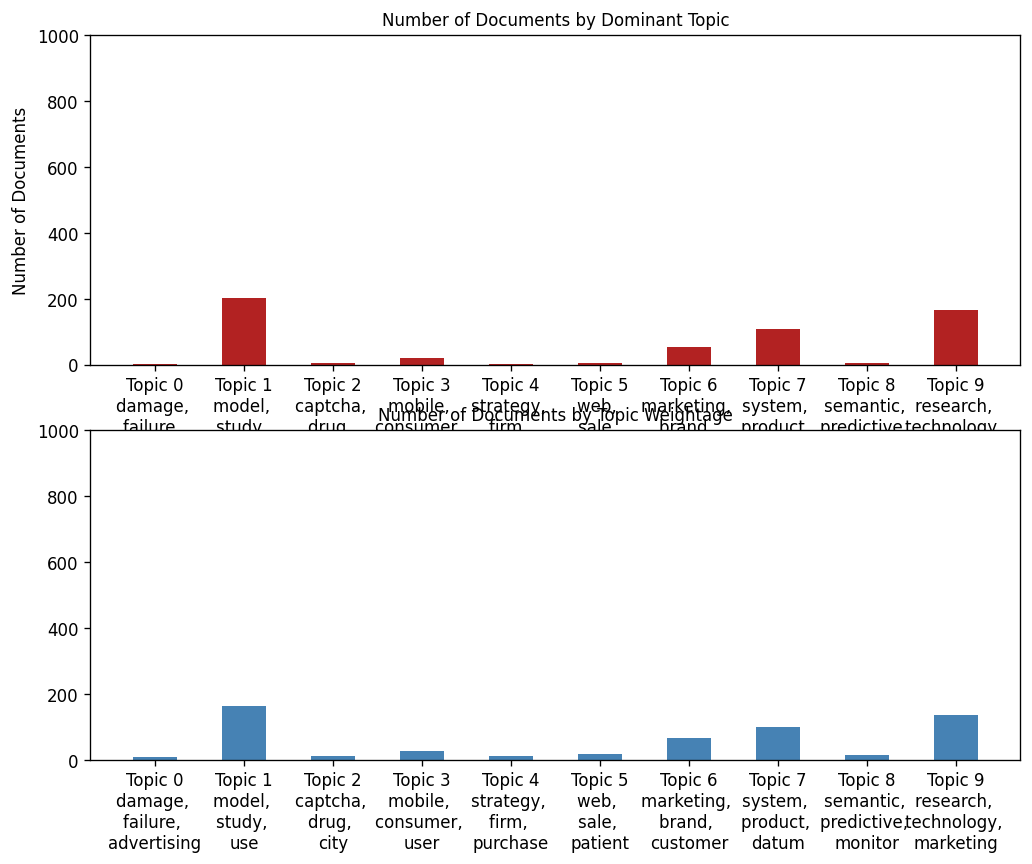

In [32]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [33]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 433 samples in 0.001s...
[t-SNE] Computed neighbors for 433 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 433 / 433
[t-SNE] Mean sigma: 0.155001
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.122467
[t-SNE] KL divergence after 1000 iterations: 0.471814


In [34]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.225121 -0.000546       1        1  29.410136
9     -0.196534  0.008289       2        1  23.782131
7     -0.185611  0.130242       3        1  17.590255
6     -0.193577 -0.011898       4        1  11.869932
3     -0.016104 -0.213318       5        1   4.747121
5      0.139857  0.202245       6        1   3.289271
8      0.171644  0.000725       7        1   2.726143
2      0.210076  0.086168       8        1   2.452545
4      0.101692 -0.136277       9        1   2.236952
0      0.193678 -0.065631      10        1   1.895514, topic_info=              Term        Freq       Total Category  logprob  loglift
233         system  352.000000  352.000000  Default  30.0000  30.0000
197       research  433.000000  433.000000  Default  29.0000  29.0000
133           user  201.000000  201.000000  Default  28.0000  28.0000
93           study  444.000000  444.000000  Default  27.0000  27.0000
14        consumer  328.000000  328.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1598          food    8.779587   34.977537  Topic10  -4.8531   2.5834
155     investment    7.330398   22.134969  Topic10  -5.0335   2.8606
1680          come    6.530492   21.415018  Topic10  -5.1491   2.7781
252   construction    6.184326   14.390114  Topic10  -5.2035   3.1212
171        various    6.151617  133.192489  Topic10  -5.2088   0.8906

[569 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1253      4  0.453766       able
1253      6  0.518590       able
2175      9  0.945191     accept
1583      3  0.980011     access
1233      1  0.983056   accuracy
...     ...       ...        ...
172       4  0.021778      world
172       6  0.261335      world
172       8  0.021778      world
172      10  0.043556      world
1252     10  0.922000  worldwide

[1023 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 8, 7, 4, 6, 9, 3, 5, 1])

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)